<a href="https://colab.research.google.com/github/KMKomer/case-study-optimaization-of-ER-waiting-time/blob/main/regression_analysis_for_ER_waiting_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression analysis
This part of our case study on ER time optimisation will be on measuring the affecting
factors on the waitng time and patient outcome. Starting by importing libararies and loading our dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("clean_ER.csv")

In [8]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()['total_wait_time'].sort_values(ascending=False)
print(correlations)

total_wait_time                 1.000000
time_of_medical_professional    0.976446
time_to_triage                  0.953604
time_of_registration            0.924238
nurse-to-patient_ratio          0.688015
specialist_availability         0.006579
facility_size                  -0.003578
patient_satisfaction           -0.865145
Name: total_wait_time, dtype: float64


In [6]:
corelation_matrix = df[['nurse-to-patient_ratio', 'specialist_availability', 'total_wait_time', 'time_to_triage', 'time_of_medical_professional', 'time_of_registration']].corr()
print(corelation_matrix)

                              nurse-to-patient_ratio  specialist_availability  \
nurse-to-patient_ratio                      1.000000                 0.002511   
specialist_availability                     0.002511                 1.000000   
total_wait_time                             0.688015                 0.006579   
time_to_triage                              0.646690                -0.000512   
time_of_medical_professional                0.673622                 0.011028   
time_of_registration                        0.652054                 0.006500   

                              total_wait_time  time_to_triage  \
nurse-to-patient_ratio               0.688015        0.646690   
specialist_availability              0.006579       -0.000512   
total_wait_time                      1.000000        0.953604   
time_to_triage                       0.953604        1.000000   
time_of_medical_professional         0.976446        0.875145   
time_of_registration                 0.924

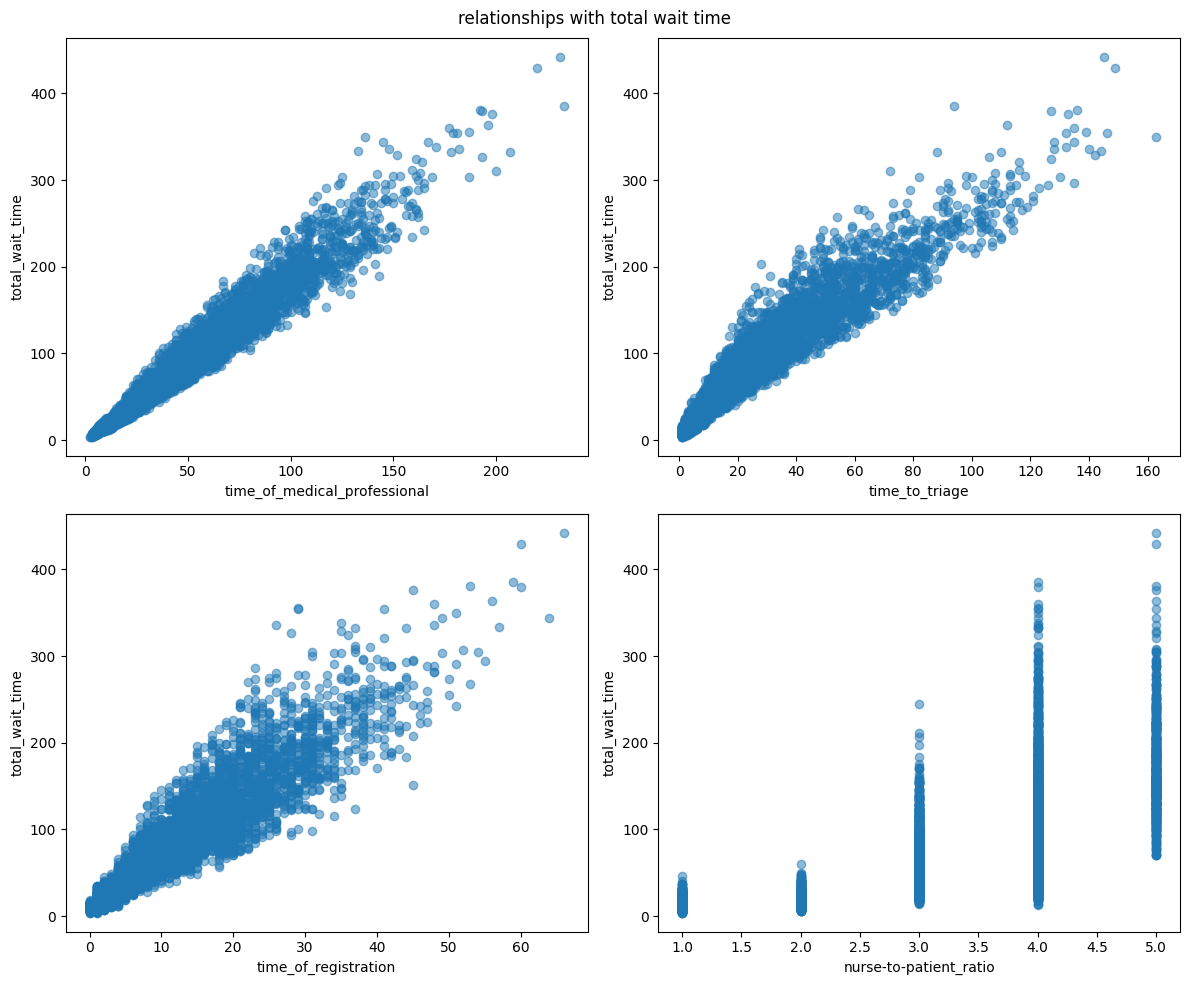

In [10]:
fig, axis = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('relationships with total wait time')

# Define X and y using relevant columns from the DataFrame
X = df[['time_of_medical_professional', 'time_to_triage', 'time_of_registration', 'nurse-to-patient_ratio']]
y = df['total_wait_time']

for i, column in enumerate(X.columns[:4]):
  row, col = i // 2 , i % 2
  axis[row, col].scatter(X[column], y, alpha = 0.5)
  axis[row, col].set_xlabel(column)
  axis[row, col].set_ylabel('total_wait_time')
plt.tight_layout()
plt.show()